<a href="https://colab.research.google.com/github/Arwaabulails/python-projects/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
train_df=pd.read_csv('/content/test.csv')
test_df=pd.read_csv('/content/train.csv')
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df['Embarked']

,Embarked
0,Q
1,S
2,Q
3,S
4,S
...,...
413,S
414,C
415,S
416,S


In [ ]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(f"\nNumber of rows: {train_df.shape[0]}")
print(f"Number of columns: {train_df.shape[1]}")
print("\nFirst 5 rows:")
print(train_df.head())


Number of rows: 418
Number of columns: 11

First 5 rows:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [ ]:
#3. Missing Values Analysis
missing = train_df.isnull().sum()
missing_percent = (missing / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)


  Column  Missing_Count  Percentage
9  Cabin            327   78.229665
4    Age             86   20.574163
8   Fare              1    0.239234


/tmp/ipython-input-2425615055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_df, x='Column', y='Percentage', palette='Reds_r')


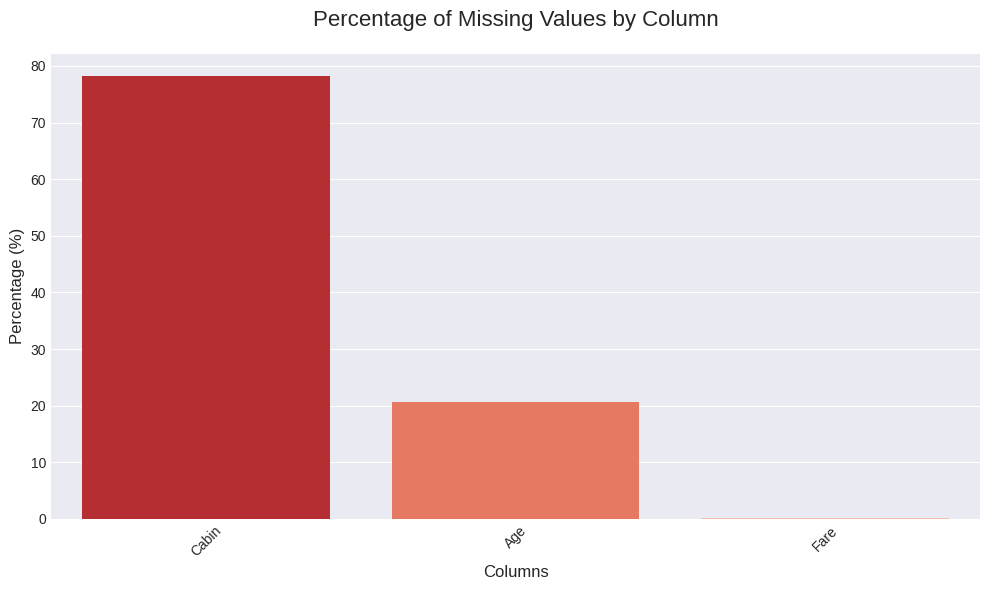

In [ ]:
# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_df, x='Column', y='Percentage', palette='Reds_r')
plt.title('Percentage of Missing Values by Column', fontsize=16, pad=20)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# 4. Survival Analysis
# ====================
print("\n" + "=" * 60)
print("SURVIVAL ANALYSIS")
print("=" * 60)

survival_count = test_df['Survived'].value_counts()
survival_rate = test_df['Survived'].mean() * 100

print(f"Survived: {survival_count[1]}")
print(f"Died: {survival_count[0]}")
print(f"Survival Rate: {survival_rate:.2f}%")


SURVIVAL ANALYSIS
Survived: 342
Died: 549
Survival Rate: 38.38%


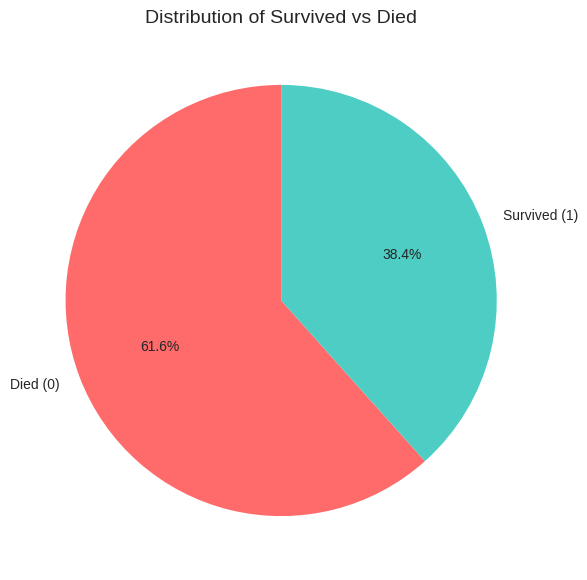

In [ ]:
import matplotlib.pyplot as plt


survival_count = [549, 342]  # [Died, Survived]
plt.figure(figsize=(7, 7))  # حجم الشكل
plt.pie(survival_count,
        labels=['Died (0)', 'Survived (1)'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff6b6b', '#4ecdc4'])
plt.title('Distribution of Survived vs Died', fontsize=14)
plt.show()



# Survival by Gender


In [ ]:

gender_survival = pd.crosstab(train_df['Sex'], test_df['Survived'], margins=True)
gender_survival_pct = pd.crosstab(train_df['Sex'], test_df['Survived'], normalize='index') * 100

print("\nCount:")
print(gender_survival)
print("\nPercentage:")
print(gender_survival_pct)


Count:
Survived    0    1  All
Sex                    
female     98   54  152
male      157  109  266
All       255  163  418

Percentage:
Survived          0          1
Sex                           
female    64.473684  35.526316
male      59.022556  40.977444


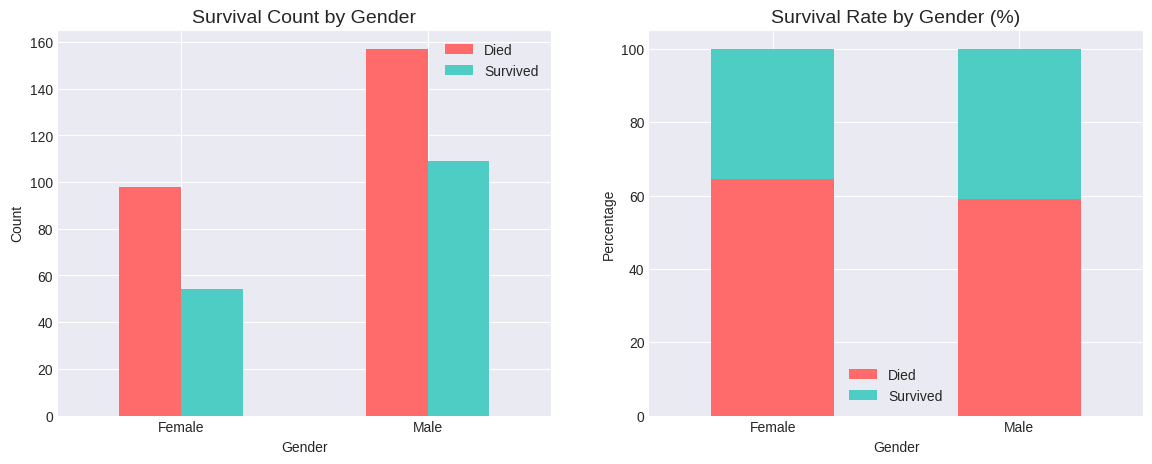

In [ ]:
# Plot survival by gender
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
pd.crosstab(train_df['Sex'], test_df['Survived']).plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Survival Count by Gender', fontsize=14)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Female', 'Male'], rotation=0)
axes[0].legend(['Died', 'Survived'])


# Percentage plot
gender_survival_pct.plot(kind='bar', ax=axes[1], color=['#ff6b6b', '#4ecdc4'], stacked=True)
axes[1].set_title('Survival Rate by Gender (%)', fontsize=14)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(['Female', 'Male'], rotation=0)
axes[1].legend(['Died', 'Survived'])

# Survival by Passenger Class


In [ ]:
class_survival = pd.crosstab(train_df['Pclass'], test_df['Survived'], margins=True)
class_survival_pct = pd.crosstab(train_df['Pclass'], test_df['Survived'], normalize='index') * 100

print("\nCount:")
print(class_survival)
print("\nPercentage:")
print(class_survival_pct)


Count:
Survived    0    1  All
Pclass                 
1          71   36  107
2          53   40   93
3         131   87  218
All       255  163  418

Percentage:
Survived          0          1
Pclass                        
1         66.355140  33.644860
2         56.989247  43.010753
3         60.091743  39.908257


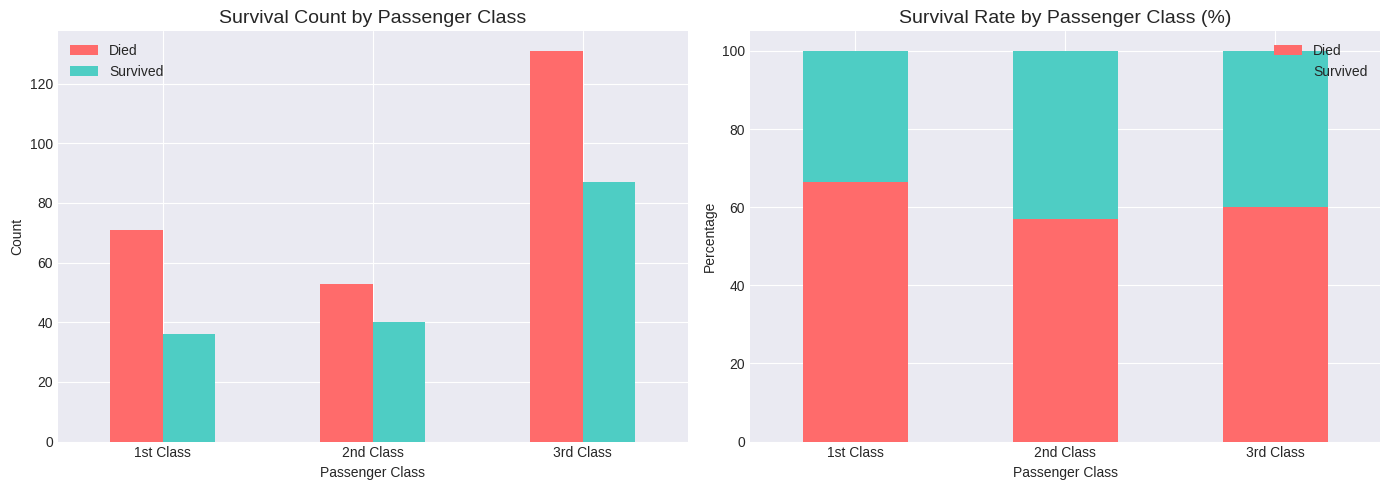

In [ ]:
# Plot survival by class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
pd.crosstab(train_df['Pclass'], test_df['Survived']).plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Survival Count by Passenger Class', fontsize=14)
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
axes[0].legend(['Died', 'Survived'])

# Percentage plot
class_survival_pct.plot(kind='bar', ax=axes[1], color=['#ff6b6b', '#4ecdc4'], stacked=True)
axes[1].set_title('Survival Rate by Passenger Class (%)', fontsize=14)
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
axes[1].legend(['Died', 'Survived'])

plt.tight_layout()
plt.savefig('survival_by_class.png', dpi=300, bbox_inches='tight')
plt.show()


# Age Distribution

In [ ]:
print(f"Mean Age: {train_df['Age'].mean():.2f}")
print(f"Median Age: {train_df['Age'].median():.2f}")
print(f"Min Age: {train_df['Age'].min():.2f}")
print(f"Max Age: {train_df['Age'].max():.2f}")

Mean Age: 30.27
Median Age: 27.00
Min Age: 0.17
Max Age: 76.00


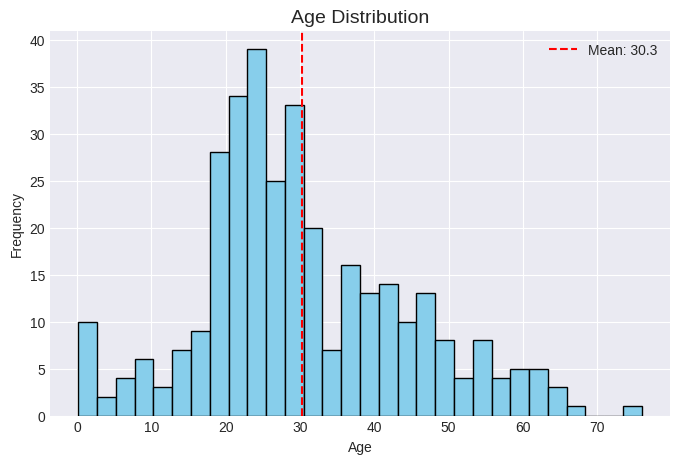

In [ ]:
import matplotlib.pyplot as plt

# Histogram for Age only
plt.figure(figsize=(8, 5))  # حجم الشكل
plt.hist(train_df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(train_df['Age'].mean(), color='red', linestyle='--', label=f"Mean: {train_df['Age'].mean():.1f}")
plt.legend()
plt.show()



# Fare Distribution

In [ ]:
print(f"Mean Fare: ${train_df['Fare'].mean():.2f}")
print(f"Median Fare: ${train_df['Fare'].median():.2f}")
print(f"Min Fare: ${train_df['Fare'].min():.2f}")
print(f"Max Fare: ${train_df['Fare'].max():.2f}")

Mean Fare: $35.63
Median Fare: $14.45
Min Fare: $0.00
Max Fare: $512.33


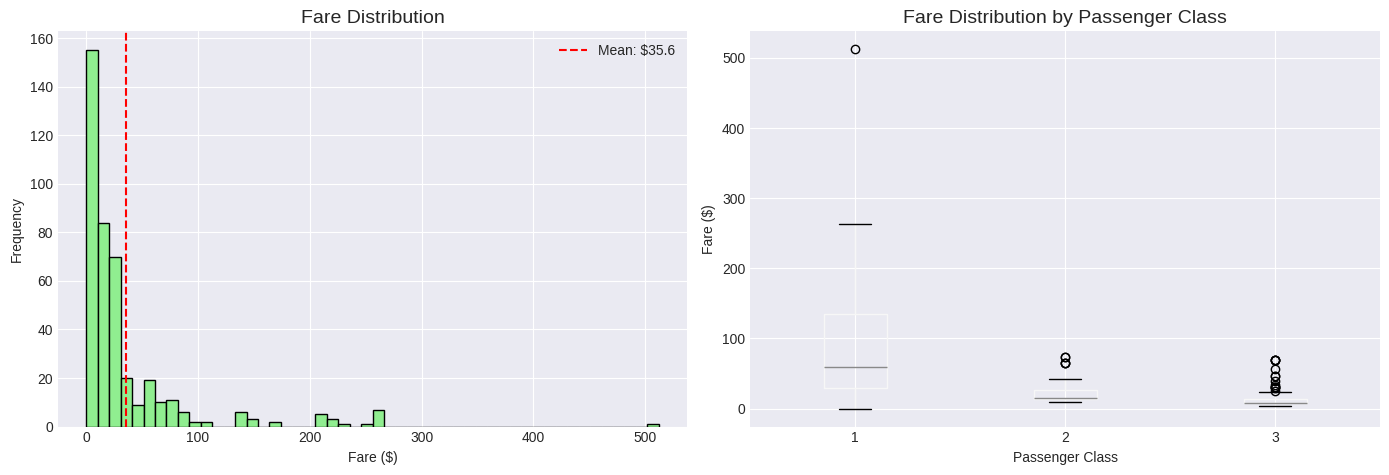

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train_df['Fare'], bins=50, color='lightgreen', edgecolor='black')
axes[0].set_title('Fare Distribution', fontsize=14)
axes[0].set_xlabel('Fare ($)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(train_df['Fare'].mean(), color='red', linestyle='--', label=f"Mean: ${train_df['Fare'].mean():.1f}")
axes[0].legend()

# Box plot by class
train_df[['Fare', 'Pclass']].boxplot(by='Pclass', ax=axes[1])
axes[1].set_title('Fare Distribution by Passenger Class', fontsize=14)
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Fare ($)')
plt.suptitle('')

plt.tight_layout()
plt.savefig('fare_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Embarked Port Analysis

In [ ]:
embarked_count = train_df['Embarked'].value_counts()
print(embarked_count)

embarked_survival = pd.crosstab(train_df['Embarked'], test_df['Survived'], normalize='index') * 100
print("\nSurvival Rate by Port:")
print(embarked_survival)

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

Survival Rate by Port:
Survived          0          1
Embarked                      
C         63.725490  36.274510
Q         52.173913  47.826087
S         61.481481  38.518519


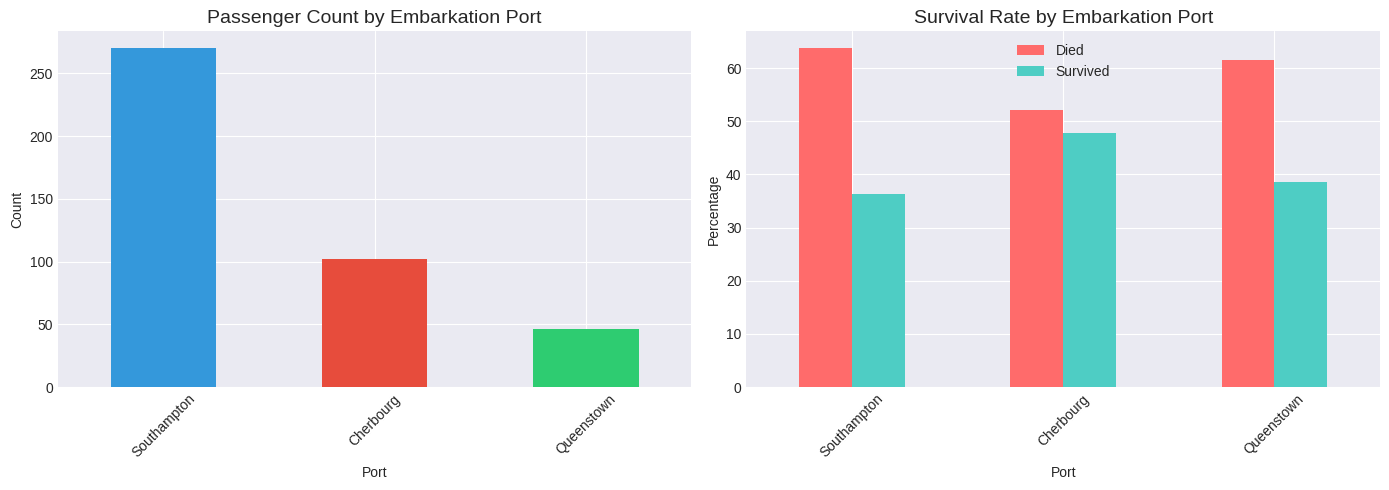

In [ ]:
# Plot embarked distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
embarked_count.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0].set_title('Passenger Count by Embarkation Port', fontsize=14)
axes[0].set_xlabel('Port')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'], rotation=45)

# Survival rate by port
embarked_survival.plot(kind='bar', ax=axes[1], color=['#ff6b6b', '#4ecdc4'])
axes[1].set_title('Survival Rate by Embarkation Port', fontsize=14)
axes[1].set_xlabel('Port')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'], rotation=45)
axes[1].legend(['Died', 'Survived'])

plt.tight_layout()
plt.savefig('embarked_analysis.png', dpi=300, bbox_inches='tight')
plt.show()